# Computer Homework 2: Electric Fields and Gauss's Law

In this assignment we will review Gauss' law (equivalent to Coulomb's law) and understand its limitations.  We will then use the superposition principle and Coulomb's law to calculate the field of a spherical charge distribution and a cube of charge.  We will compare these solutions to each other and to the analytic solution for a spherical charge distribution from Gauss' law.

## Organization of this notebook:

This notebook is divided into three sections.  We first review Gauss' law, next we review how to do integration with Python (you will need this to apply the superposition principle to compute the field of the sphere and cube).  The final section is the two assignments.  The first assignment, homework 3, is to calculate the electric field.  In the next assignment, we will compute the electric potential.

## Gauss' Law

Gauss' law is mathematically equivalent to Coulomb's law.  It expresses a relation between the electrostatic flux ($\Phi_E$) through a closed surface and the charge enclosed ($Q$) through the following relation:  $$\Phi_E \equiv \oint_{surface} \vec E \cdot d\vec A  = \frac {Q_{encl}} {\epsilon_0}. $$  It is often convenient to remember that the charge enclosed can be expressed as an integral over the volume enclosed by the bounding surface of Gauss' law: $Q_{encl} = \iiint_{volume} \rho dV$.  

You have complete choice over which surface to integrate over.  This freedom can be used to make arguments about the distribution of charges in conductors or to calculate the field in cases with a high degree of symmetry.   To calculate $\vec E$ using this law you must find a surface on which the electric field magnitude is constant and the field is always normal to the surface.   This means you need either continuous translation symmetry (e.g., a plane or the axial direction of a cylinder), or/and a continuous rotation symmetry (eg a specially symmetric charge distribution or the azimuthal direction of a cylindrically symmetric charge distribution).  In cases which have these symmetries this is the best way to calculate the field.  

However, there are many charge distributions that don't have this symmetry.  In that case you must resort to other techniques including superposition. For continuous charge distributions, superposition takes the form of an integral.

### Superposition
In the previous exercise we presented superposition as the rule that the field from two souerces is the vector sum of both.  It is easy to extend this to a continuous distribution of charges:  $$\vec E(\vec r)  = \frac {1}{4\pi\epsilon_0}  \iiint_{\mathrm{charge~distribution}} \frac {\hat {\mathscr r}}{{\mathscr r}^2}  {\rho dV}.$$  

It is important to note that $\vec {\mathscr r} = \vec r - \vec r_{charge} $.  In other words, $\vec {\mathscr r}$ depends on the variables you are integrating over.


### Numerical Integration
For the purposes of numerical computation recall that the integral is defined as the limit of a Riemann sum:  $\iiint f(r) dV = \lim_{\Delta V \to 0}  \sum_{\mathrm{volume~elements}} f(r) \Delta V$.  In other words an integral is calculated by dividing the integration volume into lots of small chunks, evaluating the function at the center of these chunks, multiplying them by the volume of the chunk and then summing over all chunks.  With a computer we can't make the chunks infinitely small, but if we make them small enough we can calculate the integral to sufficient precision.   (Lots of care is needed in choosing what precision is needed and verifying that you have met that requirement.)
### NumPy
We will be using routines from the NumPy library.  The users guide for NumPy is at http://docs.scipy.org/doc/numpy/user/
### The first part of the code is to import the usual libraries

In [1]:
# numpy (NUMerical PYthon) is a library that inclues most of the numerical functionality you will need
import numpy as np                  
# matplotlib (MAThematical PLOTting LIBrary) is the library we use to plot
import matplotlib.pyplot as plt

## Example 1
## Calculate the total charge contained in a 1m$^{3}$ cube with a charge density of 1C/m$^{3}$

The answer is obvious, but this is a great way to show you how to perform a numerical integration.  We want to validate the numeric algorithm, and the easiest way to do this is start with a problem that is easy to code, and compare the result to a known answer.

The first step is to create arrays that give the $x$, $y$, and $z$ position of the elements of our charge distribution.  We have freedom to choose a step size for the grid.  In making this choise we must be careful that the steps are small enough that the function doesn't change much but not so small that the contribution of the element is not lost in the precision of the addition.

Documentation on np.meshgrid can be found at http://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html?highlight=meshgrid#numpy.meshgrid
and documentation on np.arange can be found at
http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html?highlight=arange#numpy.arange

In [2]:
linear_step = 0.05  ## this is the step size expressed as a linear dimension.
negative_cube_edge = -0.5  ## low boundary of the cube in x,y, and z
positive_cube_edge = 0.5   ## upper boundary ... 

x_charge, y_charge, z_charge = np.meshgrid(
                                np.arange(negative_cube_edge, positive_cube_edge, linear_step),
                                np.arange(negative_cube_edge, positive_cube_edge, linear_step),
                                np.arange(negative_cube_edge, positive_cube_edge, linear_step)
                                )

print("shape of the x_charge array: ", np.shape(x_charge))
print("number of elements in the x_charge array: ", np.size(x_charge))

shape of the x_charge array:  (20, 20, 20)
number of elements in the x_charge array:  8000


This creates three arrays that each have 8000 elements representing 20 steps in $x, y$, and $z$. These are three dimensional arrays.

The next step is to compute the charge in each cell.  The volume element associated with each grid point is just the "linear_step" variable cubed.  So the charge in each cell is just the charge density times the volume element.

In [3]:
rho = 1.
d_vol = linear_step**3.

## now make an array that holds the charge of each grid point
dq = np.ones(np.shape(x_charge)) * rho * d_vol  ## this makes an array of the same 
                                          # size as x (and y and z)
                                          # with all elements set to rho * d_vol
print("Shape of the dq array: ", np.shape(dq))

Shape of the dq array:  (20, 20, 20)


The ```np.ones()``` function creates an array with every element set to 1.  The function ```np.shape()``` returns the array shape of its argument.   Thus 
```
np.ones(np.shape(x_charge))
```
creates an array of the same shape of ```x_charge```, but with all elements set to 1.

*Short Exercise:* In the cell below output an np.ones() object with shape (2,2) to see an example

In [4]:


a = np.ones((2,2))
print(np.shape(a))

(2, 2)


The next and final step is to do the integration.  This is wonderfully straightforward.

In [5]:
## this is the triple integral
total_charge = np.sum(dq)      ## could it be any easier to do a triple integral?
    
print("This is the total charge: ",total_charge, " consistent with our expectation it would be 1.")

This is the total charge:  1.0000000000000004  consistent with our expectation it would be 1.


The notation make the triple integral look trivial, but remember that the hard work was all in setting up the arrays of the position variables and dq.  And because computers love doing this, they feel a special kinship with electric fields.

## Example 2
## Calculate the total charge continued within a sphere with 1 m diameter and a charge density of 1C/m$^{3}$

All we have to do is take the cubic grid from the first example, but only sum over the charges contained within a sphere.  We can do this with the "where" command. 

In [6]:
## calculate the radius from the origin
r = np.sqrt(x_charge**2 + y_charge**2 + z_charge**2)

## test for the points that are within 0.5 m of the origin
inside_sphere = np.where(r <= 0.5) 

## do the triple integral
total_charge = np.sum(dq[inside_sphere])   ## the brackets subscript dq with only the elements inside
                                           ## has the triple integral over a sphere ever been easier?
print("This is the total charge: ",total_charge)
print("the analytic integral gives: ", 4/3. * np.pi * 0.5**3.)
print("so we have this to ",round((total_charge - 4/3. * np.pi * 0.5**3.)/total_charge*100,2),"% accuracy")

This is the total charge:  0.5207500000000003
the analytic integral gives:  0.5235987755982988
so we have this to  -0.55 % accuracy


## Miscellaneous useful code tricks 
### (1) Recall from assignment 1, if you add (or subtract) a number to an array python adds that number to each element in the array

As an example, if we have a reference position (x,y,z) and we want the separation vector between this point and the grid positions that describe our charge distribution we can do the following:

In [7]:
## reference position, that is the point r where we are going to find the electric field
x = 10.
y = 1.
z = 0.

## these are the componets of the separation vetor r_sep = r - r_charge
x_sep = x - x_charge
y_sep = y - y_charge
z_sep = z - z_charge

## print out the size
print("Don't forget these are arrays.  For example x_sep has ", np.size(x_sep), "elements")

Don't forget these are arrays.  For example x_sep has  8000 elements


### (2) The for loop 
You can perform a loop (i.e. iterate) over any python object that is an iterable, performing an action on each iteration.  A numpy array is one example of an iterable python object.  Let us take a numpy array ranging from -2 to 2, with values spaced by 0.5. You can do the following to loop over all the elements, with the action of printing each element:

In [8]:
x_field = np.arange(-2,2,.5)

for x in x_field:
    print(x)

## you can play tricks to make this work on 2d arrays too.

-2.0
-1.5
-1.0
-0.5
0.0
0.5
1.0
1.5


## Homework 2 [40 points total] begins here:

### The field of continuous charge distributions
We can use the superposition principle or Gauss's law to calculate the field of a continuous charge distribution.  In this exercise we will use both for the sphere and then use superposition to calculate the field of a cube of charge.

First use Guass' law to calculate the field of a solid insulating sphere with a radius of  0.5 m with charge density 1 C /  m$^{3}$.  There is no charge outside this sphere.  Your answer should include the field inside and outside the sphere.  Plot the field as a function of distance from the center of the sphere.  You will use this to validate your calculations.

#### (Part 1, 10 points)   Use the superposition principle and gauss' law to calculate the field from the sphere described above, using numerical integration and check that the results are the same as your calculation.
Since these calculations are time consuming find the components of the field along the x axis in the range from -3 to 3 m.  Full credit for a correct calculation and a plot (or plots) that show the x,y, and z components of your field agree with the analytic solution.


In [9]:
import numpy as np

radius = 0.5
rho = 1.
k = 8.99e9
e_0 = 1 / (4 * np.pi * k)
cube_min = -3
cube_max = 3
linear_step = 0.05
dV = linear_step**3
epsilon = 0.001

def calc_gauss_flux(rad):
    flux = 4 / 3 * np.pi * rad**3 * rho / e_0
    return flux

def gauss_Efield(x_pos, y_pos, z_pos):
    rad = np.sqrt(x_pos**2 + y_pos**2 + z_pos**2)
    flux = calc_gauss_flux(rad if rad <= 0.5 else 0.5)
    e_field = flux / (4 * np.pi * rad**2)
    dEx = e_field * x_pos / rad
    dEy = e_field * y_pos / rad
    dEz = e_field * z_pos / rad
    return dEx, dEy, dEz
    
x, y, z = np.meshgrid(
            np.arange(cube_min, cube_max, linear_step),
            np.arange(cube_min, cube_max, linear_step),
            np.arange(cube_min, cube_max, linear_step), indexing='ij'
            )

dq = np.ones(np.shape(x)) * rho * dV
rad_xyz = np.sqrt(x**2 + y**2 + z**2)


    
inside_sphere = np.where(rad_xyz <= 0.5)


def E_field_point(x_pos, y_pos, z_pos):
    
    rad = np.sqrt(x_pos**2 + y_pos**2 + z_pos**2)
    
    x_sep = x_pos - x
    y_sep = y_pos - y
    z_sep = z_pos - z
    
    r_sep = np.sqrt(x_sep**2 + y_sep**2 + z_sep**2)
    
    dEx = k * dq[inside_sphere] * x_sep[inside_sphere] * r_sep[inside_sphere]**-3 * (r_sep[inside_sphere] > epsilon)
    dEy = k * dq[inside_sphere] * y_sep[inside_sphere] * r_sep[inside_sphere]**-3 * (r_sep[inside_sphere] > epsilon)
    dEz = k * dq[inside_sphere] * z_sep[inside_sphere] * r_sep[inside_sphere]**-3 * (r_sep[inside_sphere] > epsilon)

    return np.sum(dEx), np.sum(dEy), np.sum(dEz)

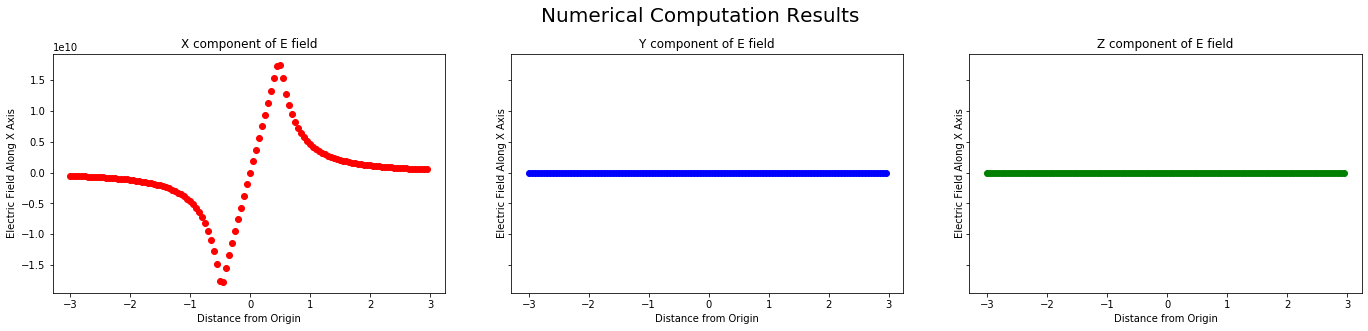

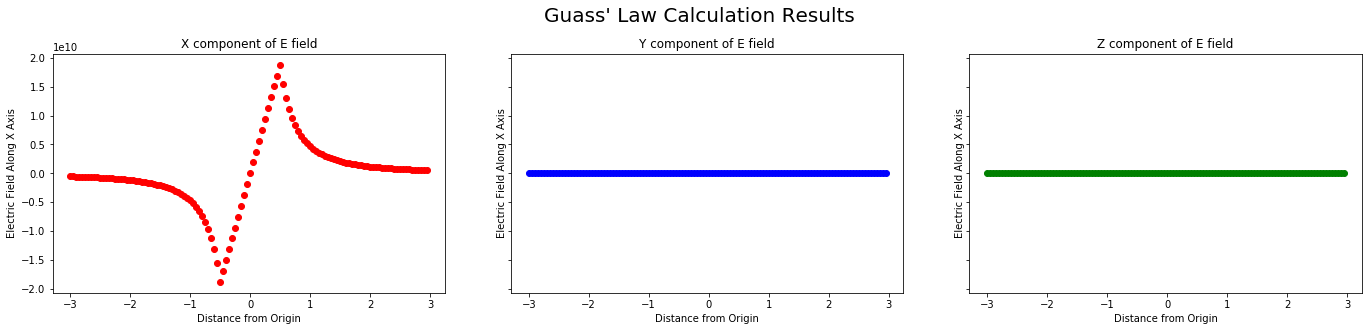

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5), sharey=True)
fig.suptitle("Numerical Computation Results", fontsize=20)
fig.tight_layout(pad=5)
ax1.set_title("X component of E field")
ax2.set_title("Y component of E field")
ax3.set_title("Z component of E field")


ax1.set_xlabel("Distance from Origin")
ax1.set_ylabel("Electric Field Along X Axis")

ax2.set_xlabel("Distance from Origin")
ax2.set_ylabel("Electric Field Along X Axis")

ax3.set_xlabel("Distance from Origin")
ax3.set_ylabel("Electric Field Along X Axis")


x_vals = np.arange(-3, 3, linear_step)
for i in x_vals:
    Ex, Ey, Ez = E_field_point(i, 0, 0)
    ax1.plot(i, Ex, 'ro')
    ax2.plot(i, Ey, 'bo')
    ax3.plot(i, Ez, 'go')
plt.show()


fig2, (gx1, gx2, gx3) = plt.subplots(1, 3, figsize=(20,5), sharey=True)
fig2.suptitle("Guass' Law Calculation Results", fontsize=20)
fig2.tight_layout(pad=5)
gx1.set_title("X component of E field")
gx2.set_title("Y component of E field")
gx3.set_title("Z component of E field")

gx1.set_xlabel("Distance from Origin")
gx1.set_ylabel("Electric Field Along X Axis")

gx2.set_xlabel("Distance from Origin")
gx2.set_ylabel("Electric Field Along X Axis")

gx3.set_xlabel("Distance from Origin")
gx3.set_ylabel("Electric Field Along X Axis")

for i in x_vals:
    Ex, Ey, Ez = gauss_Efield(i, 0, 0)
    gx1.plot(i, Ex, 'ro')
    gx2.plot(i, Ey, 'bo')
    gx3.plot(i, Ez, 'go')

plt.show()

#### (Part 2, 10 points)   Adapt the code from part 1 to calculate the field of a cube with side length 1 m that is centered at the origin and has the same charge density, that is density 1 C /  m$^{3}$.  
Calculate the field of the cube at the same positions as the sphere and compare the two results.  Full credit for a correct calculation and a plot (or plots) that show the x,y, and z components of the field.



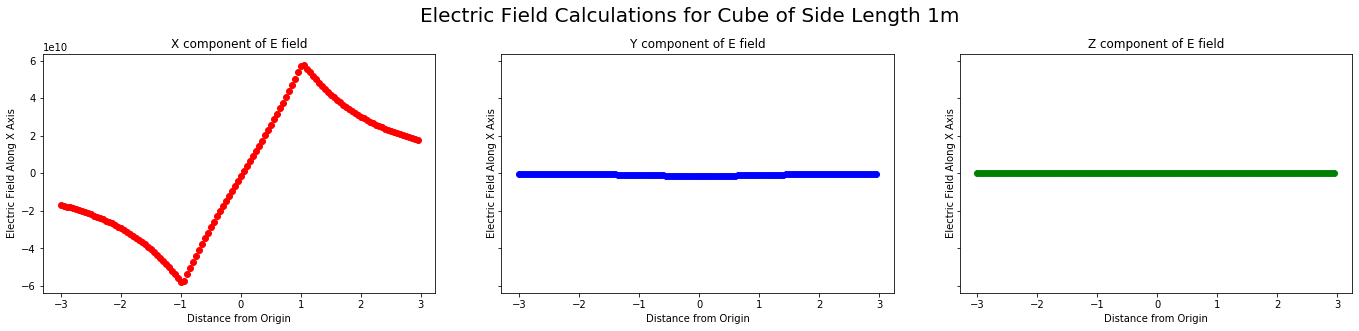

In [11]:
inside_sphere = np.where(np.logical_and((np.abs(x) <= 1), (np.abs(y) <= 1), (np.abs(z) <= 1)))

fig3, (cx1, cx2, cx3) = plt.subplots(1, 3, figsize=(20,5), sharey=True)
fig3.suptitle("Electric Field Calculations for Cube of Side Length 1m", fontsize=20)
fig3.tight_layout(pad=5)

cx1.set_title("X component of E field")
cx2.set_title("Y component of E field")
cx3.set_title("Z component of E field")

cx1.set_xlabel("Distance from Origin")
cx1.set_ylabel("Electric Field Along X Axis")

cx2.set_xlabel("Distance from Origin")
cx2.set_ylabel("Electric Field Along X Axis")

cx3.set_xlabel("Distance from Origin")
cx3.set_ylabel("Electric Field Along X Axis")

for i in x_vals:
    Ex, Ey, Ez = E_field_point(i, 0, 0)
    cx1.plot(i, Ex, 'ro')
    cx2.plot(i, Ey, 'bo')
    cx3.plot(i, Ez, 'go')
plt.show()


#### (Part 3, 10 points) make a vector plot in the x-y plane of the field of the sphere and the field of the cube.  

Full credit for nice looking 2d vector plots of the field for both charge configurations.

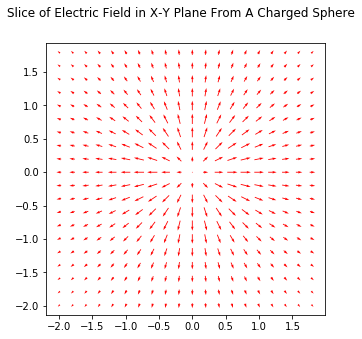

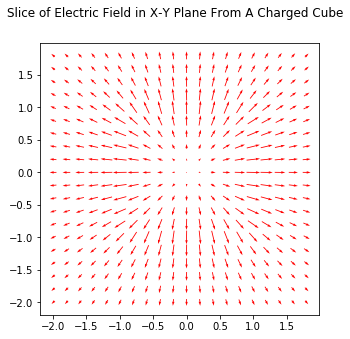

In [12]:
## your code should go here.
z_val = 0.5
### a few hints to make this easy

# One way to do this is to adapt the code for the field of a 2d square sheet that
# we discussed in class this week.

## Another way is to loop over the field points in your grid.
## This makes two two dimensional arrays
x2d, y2d = np.meshgrid(np.arange(-2, 2, 0.2),
                   np.arange(-2, 2, 0.2))
## you can flatten these (convert them to 1d arrays) using ravel
x2d = np.ravel(x2d)
y2d = np.ravel(y2d)
## then you can make an array to index these position variables and proceed from here.
index = np.arange(np.size(x2d))
# print(np.shape(x2d))
# index2 = np.arange(np.size(x2d[0]))

inside_sphere = np.where(rad_xyz <= 0.5) #masking for sphere

Ex2d = np.ones(np.shape(x2d))
Ey2d = np.ones(np.shape(y2d))

scale = 8

for i in index:
    dEx, dEy, dEz = E_field_point(x2d[i], y2d[i], 1)
    Ex2d[i] = dEx * scale
    Ey2d[i] = dEy * scale

fig4, dx1 = plt.subplots(1, 1, figsize=(5,5))
fig4.suptitle("Slice of Electric Field in X-Y Plane From A Charged Sphere")
    
Qplot = dx1.quiver(x2d, y2d, 
                   Ex2d, Ey2d, 
                   units='inches',pivot='mid',color='r',
                    scale= 1e11)

dx1.axis('equal')

plt.show()

inside_sphere = np.where(np.logical_and((np.abs(x) <= 1), (np.abs(y) <= 1), (np.abs(z) <= 1)))

Ex2d = np.ones(np.shape(x2d))
Ey2d = np.ones(np.shape(y2d))

for i in index:
    dEx, dEy, dEz = E_field_point(x2d[i], y2d[i], 1)
    Ex2d[i] = dEx
    Ey2d[i] = dEy

fig5, dx2 = plt.subplots(1, 1, figsize=(5,5))
fig5.suptitle("Slice of Electric Field in X-Y Plane From A Charged Cube")
    
Qplot = dx2.quiver(x2d, y2d, 
                   Ex2d, Ey2d, 
                   units='inches',pivot='mid',color='r',
                    scale= 3e11)

dx1.axis('equal')

plt.show()

#### (Part 4, 10 points)   Discussion of the results.
Is the electric field from one of the charge distributions always larger than the other, or does it depend on r? Explain physically why this result makes sense. What do you expect would happen if you looked at Ex for still larger r? Will the two curves approach each other, or do you expect the fractional difference to remain non-zero? Is there a size of cube that would make the asymptotic fields the same for the cube and sphere?

Can you use Gauss' law to calculate the field of a cube?  Why or why not?


Double click to write your discussion here.

The electric field charge distributions depend on r. This physically makes sense because the charge distribution looks like that of a sphere around the origin. The electric feild and distribution starts to differ as you approcah the edge of the surfaces, as the sphere has curvature and the cube has rigid sides. If you looked at the electric feild for larger r, both would look the same and regress to a point charge at far enough distance, as any finite charge distribution does regardless of the geometry. I expect the two curves will approach each other. Even though it seems like the sphere drops off steeper than the cube, as we take the limit as r approaches infinity both E feilds will approach each other. I think that it stands to reason that any arbitary cube size when examined sufficiently close (near origin) or far away will have the the same asymptotic fields as the shpere. However, for the behavior inbetween I don't think there is one cube that perfectly resembles the sphere. You can use Gauss' law to calculate the flux of a cube, but not the electric field. This is because the cube does not have the requisite type of symmetry that enables us to extrapolate the electric field. So while Gauss' law enables us to determine the flux we cannot use it to find the electric feild of the cube.













